In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
def power_method(A, b, n_iter):
    b_k = b.copy()
    for _ in range(n_iter):
        b_k = A @ b_k
        b_k /= np.linalg.norm(b_k)
    lamda_max = ((b_k.T @ A) @ b_k) / (np.linalg.norm(b_k) ** 2)
    return b_k, lamda_max

In [4]:
A = np.array([[2, 0],[0, -1]])

In [5]:
np.random.seed(0)
n = 500
A = np.random.rand(n, n) 
A = (A @ A.T)

In [6]:
def sampled_sr1(A, B, n_iter, n_power=0, verbose=False):
    np.random.seed(0)
    history_hess = []
    history_vec = []
    Bk = B.copy()
    for _ in range(n_iter):
        s = np.random.rand(A.shape[1])
        s, lamda_max = power_method(A - Bk, s, n_power)
        y = (A - Bk) @ s 
        history_vec.append(np.linalg.norm(s - y / lamda_max))
        if verbose:
            print(f"y={y / lamda_max}")
            print(f"s={s}")
        M = s.T @ y
        if verbose:
            print(f"lambda_max={lamda_max}")
            print(f"M={M}")
            print(f"update matrix={np.outer(y, y) * (1/M)}")
        Bk += np.outer(y, y) * (1 / M)
        history_hess.append(np.linalg.norm(A - Bk))
    return Bk, history_hess#, history_vec

In [7]:
def nesterov_greedy_sr1(A, B, n_iter, verbose=False):
    np.random.seed(0)
    history_hess = []
    history_vec = []
    Bk = B.copy()
    for _ in range(n_iter):
        val_max = -1e10
        s_max = -1
        for i in range(A.shape[0]):
            s = np.zeros(A.shape[0])
            s[i] = 1
            val = s.T @ (Bk - A) @ s
            if val > val_max:
                val_max = val
                s_max = s
        s = s_max
        y = (A - Bk) @ s 
        # history_vec.append(np.linalg.norm(s - y / lamda_max))
        if verbose:
            print(f"y={y}")
            print(f"s={s}")
        M = s.T @ y
        if verbose:
            print(f"lambda_max={lamda_max}")
            print(f"M={M}")
            print(f"update matrix={np.outer(y, y) * (1/M)}")
        if M != 0:
            Bk += np.outer(y, y) * (1 / M)
        history_hess.append(np.linalg.norm(A - Bk))
    return Bk, history_hess#, history_vec

largest eigenval of A: 2480.5646694545876


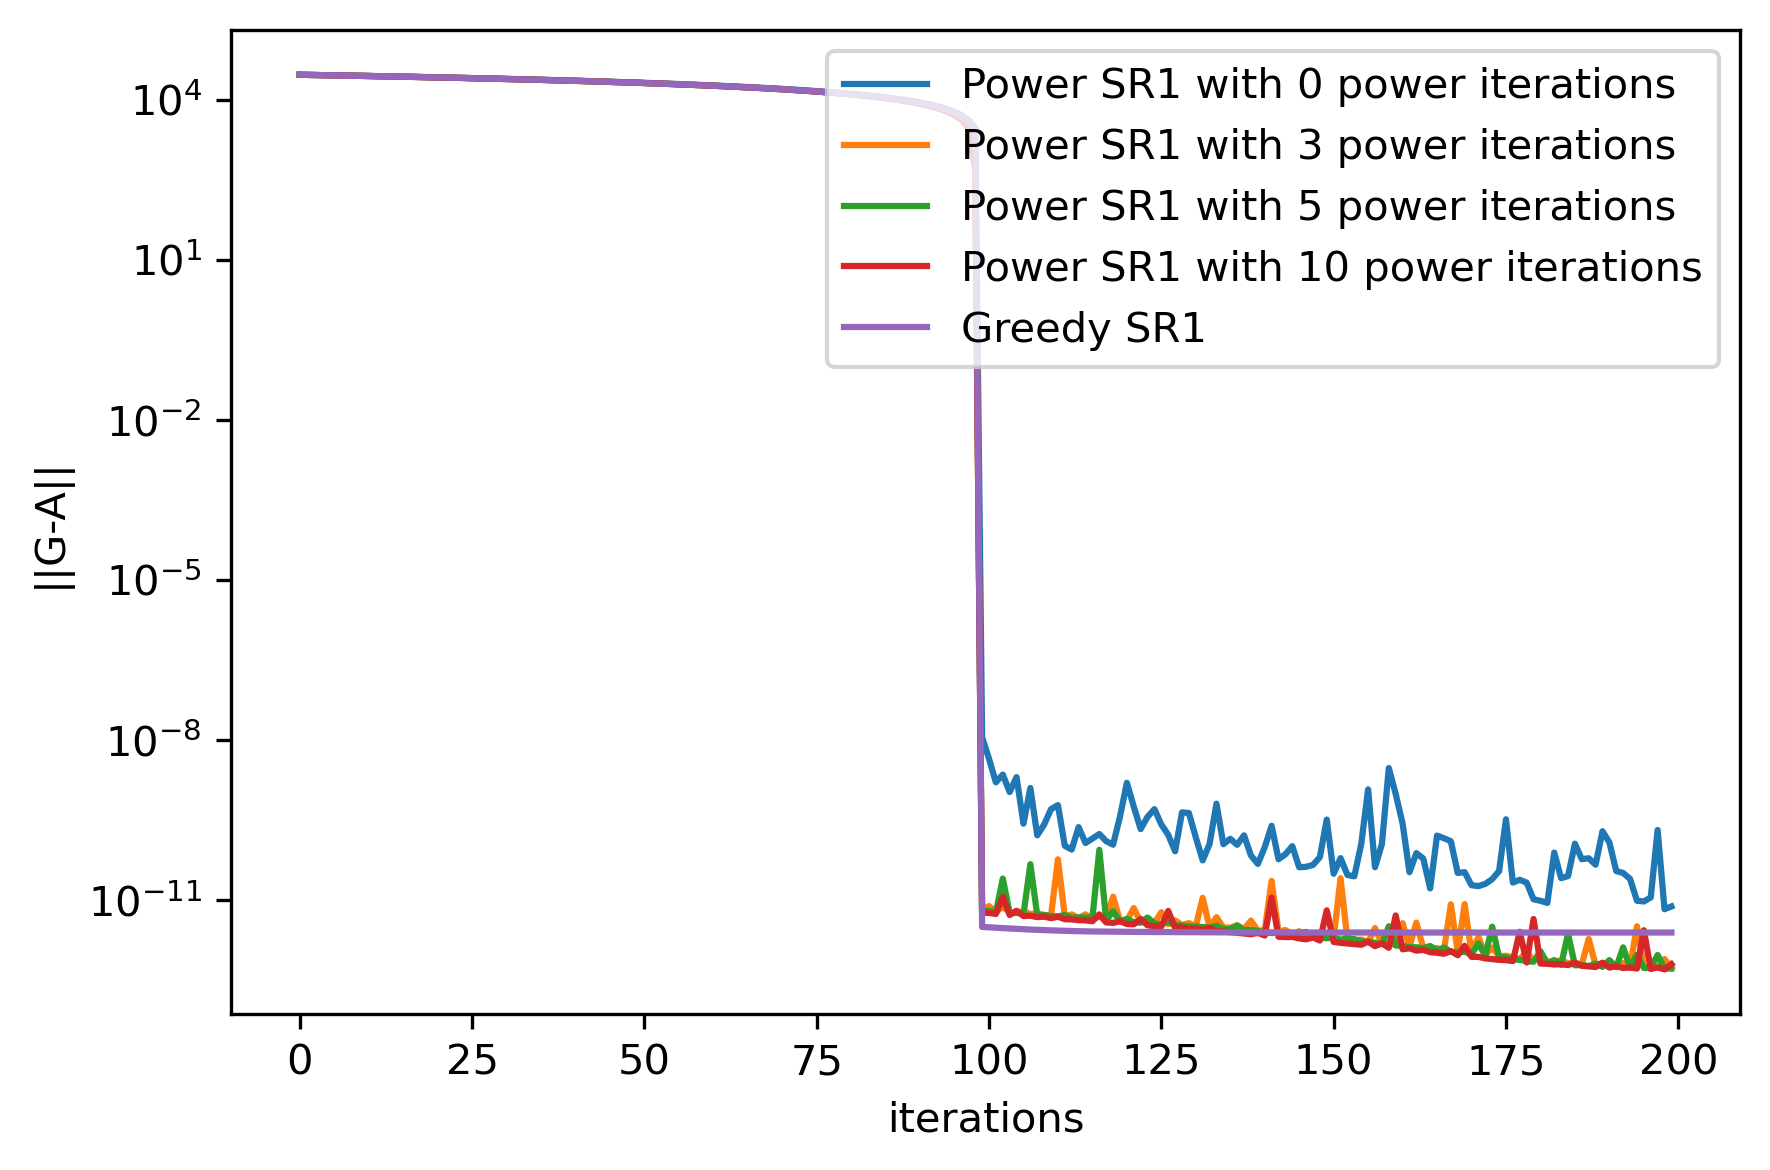

In [8]:
# np.random.seed(0)
# n = 500
# A = np.random.rand(n, n) 
# A = (A @ A.T) #+ np.diag(np.random.rand(n))
# B0 = np.eye(n) * 300
# n_iter = 1000
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

    
np.random.seed(0)
n = 100
A = np.random.rand(n, n) 
A = (A @ A.T)
print(f"largest eigenval of A: {sorted(np.linalg.eigvals(A))[-1]}")
B0 = np.eye(n) * 3000
n_iter = 200

for n_power in tqdm([0, 3, 5, 10]):
    _, history = sampled_sr1(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations")


_, history = nesterov_greedy_sr1(A=A, B=B0, n_iter=n_iter, verbose=False)
plt.semilogy(history, label=f"Greedy SR1")
plt.xlabel('iterations')
plt.ylabel('||G-A||')
plt.legend(loc = "upper right")
plt.tight_layout()    
plt.savefig('matrix_learning.pdf')
# plt.show()

In [9]:
def sampled_sr1_with_update_on_each_power_step(A, B, n_iter, n_power=0, verbose=False):
    np.random.seed(0)
    history_hess = []
    history_vec = []
    Bk = B.copy()
    for _ in range(n_iter):
        s = np.random.rand(A.shape[1])
        Bk_fixed = Bk.copy()
        for _ in range(n_power):
            s, lamda_max = power_method(A - Bk, s, n_iter=1)
            y = (A - Bk) @ s 
            history_vec.append(np.linalg.norm(s - y / lamda_max))
            if verbose:
                print(f"y={y / lamda_max}")
                print(f"s={s}")
            M = s.T @ y
            if verbose:
                print(f"lambda_max={lamda_max}")
                print(f"M={M}")
                print(f"update matrix={np.outer(y, y) * (1/M)}")
            Bk += np.outer(y, y) * (1 / M)
        history_hess.append(np.linalg.norm(A - Bk))
    return Bk, history_hess#, history_vec

largest eigenval of A: 2480.5646694545876


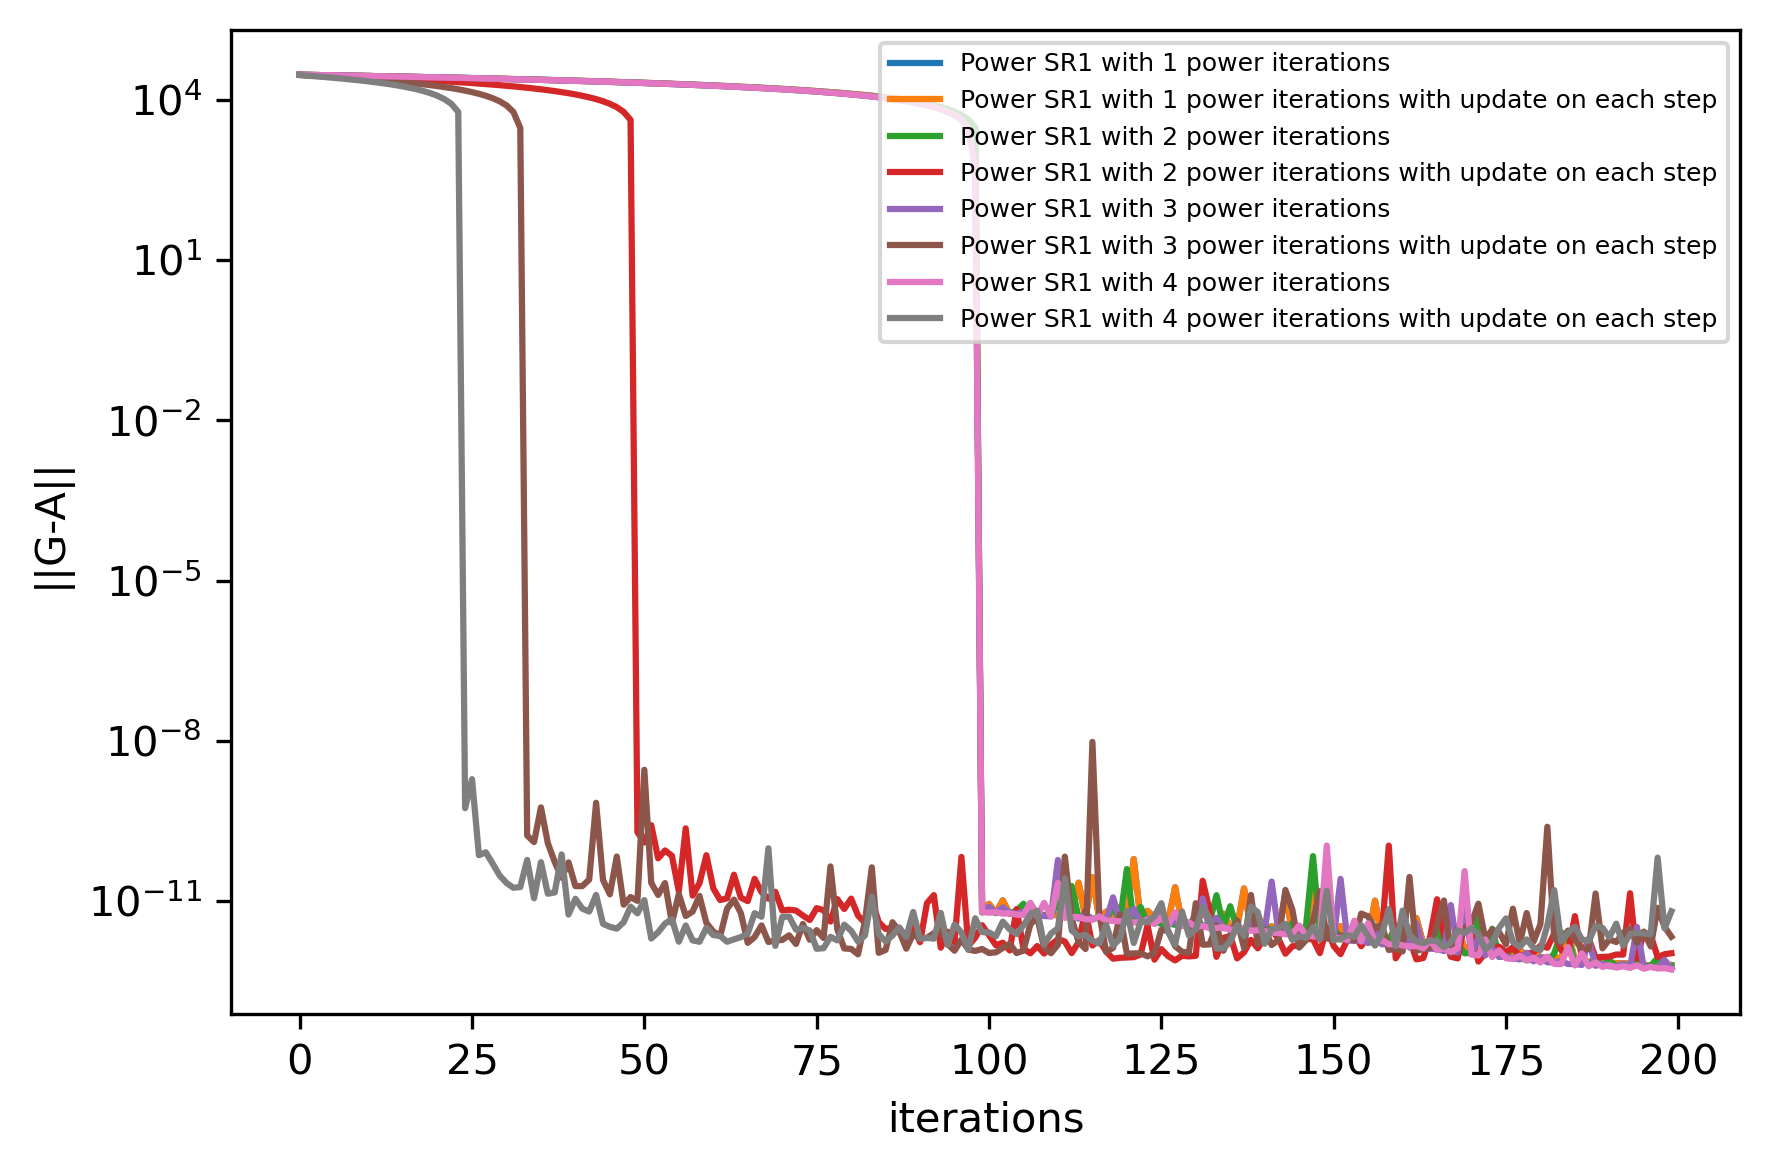

In [10]:
# np.random.seed(0)
# n = 500
# A = np.random.rand(n, n) 
# A = (A @ A.T) #+ np.diag(np.random.rand(n))
# B0 = np.eye(n) * 300
# n_iter = 1000
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

    
np.random.seed(0)
n = 100
A = np.random.rand(n, n) 
A = (A @ A.T)
print(f"largest eigenval of A: {sorted(np.linalg.eigvals(A))[-1]}")
B0 = np.eye(n) * 3000
n_iter = 200

for n_power in tqdm([1, 2, 3, 4]):
    _, history = sampled_sr1(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations")
    _, history = sampled_sr1_with_update_on_each_power_step(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations with update on each step")

# _, history = nesterov_greedy_sr1(A=A, B=B0, n_iter=n_iter, verbose=False)
# plt.semilogy(history, label=f"Greedy SR1")
plt.xlabel('iterations')
plt.ylabel('||G-A||')
plt.legend(loc = "upper right", prop={'size': 6})
plt.tight_layout()    
plt.savefig('matrix_learning.pdf')
# plt.show()

In [11]:
def sampled_sr1_with_update_on_each_power_step(A, B, n_iter, n_power=0, verbose=False):
    np.random.seed(0)
    history_hess = []
    history_vec = []
    Bk = B.copy()
    for _ in range(n_iter):
        s = np.random.rand(A.shape[1])
        for _ in range(n_power):
            s, lamda_max = power_method(A - Bk, s, n_iter=1) ## !
            y = (A - Bk) @ s 
            history_vec.append(np.linalg.norm(s - y / lamda_max))
            if verbose:
                print(f"y={y / lamda_max}")
                print(f"s={s}")
            M = s.T @ y
            if verbose:
                print(f"lambda_max={lamda_max}")
                print(f"M={M}")
                print(f"update matrix={np.outer(y, y) * (1/M)}")
            Bk += np.outer(y, y) * (1 / M)
        history_hess.append(np.linalg.norm(A - Bk))
    return Bk, history_hess#, history_vec

largest eigenval of A: 2480.5646694545876


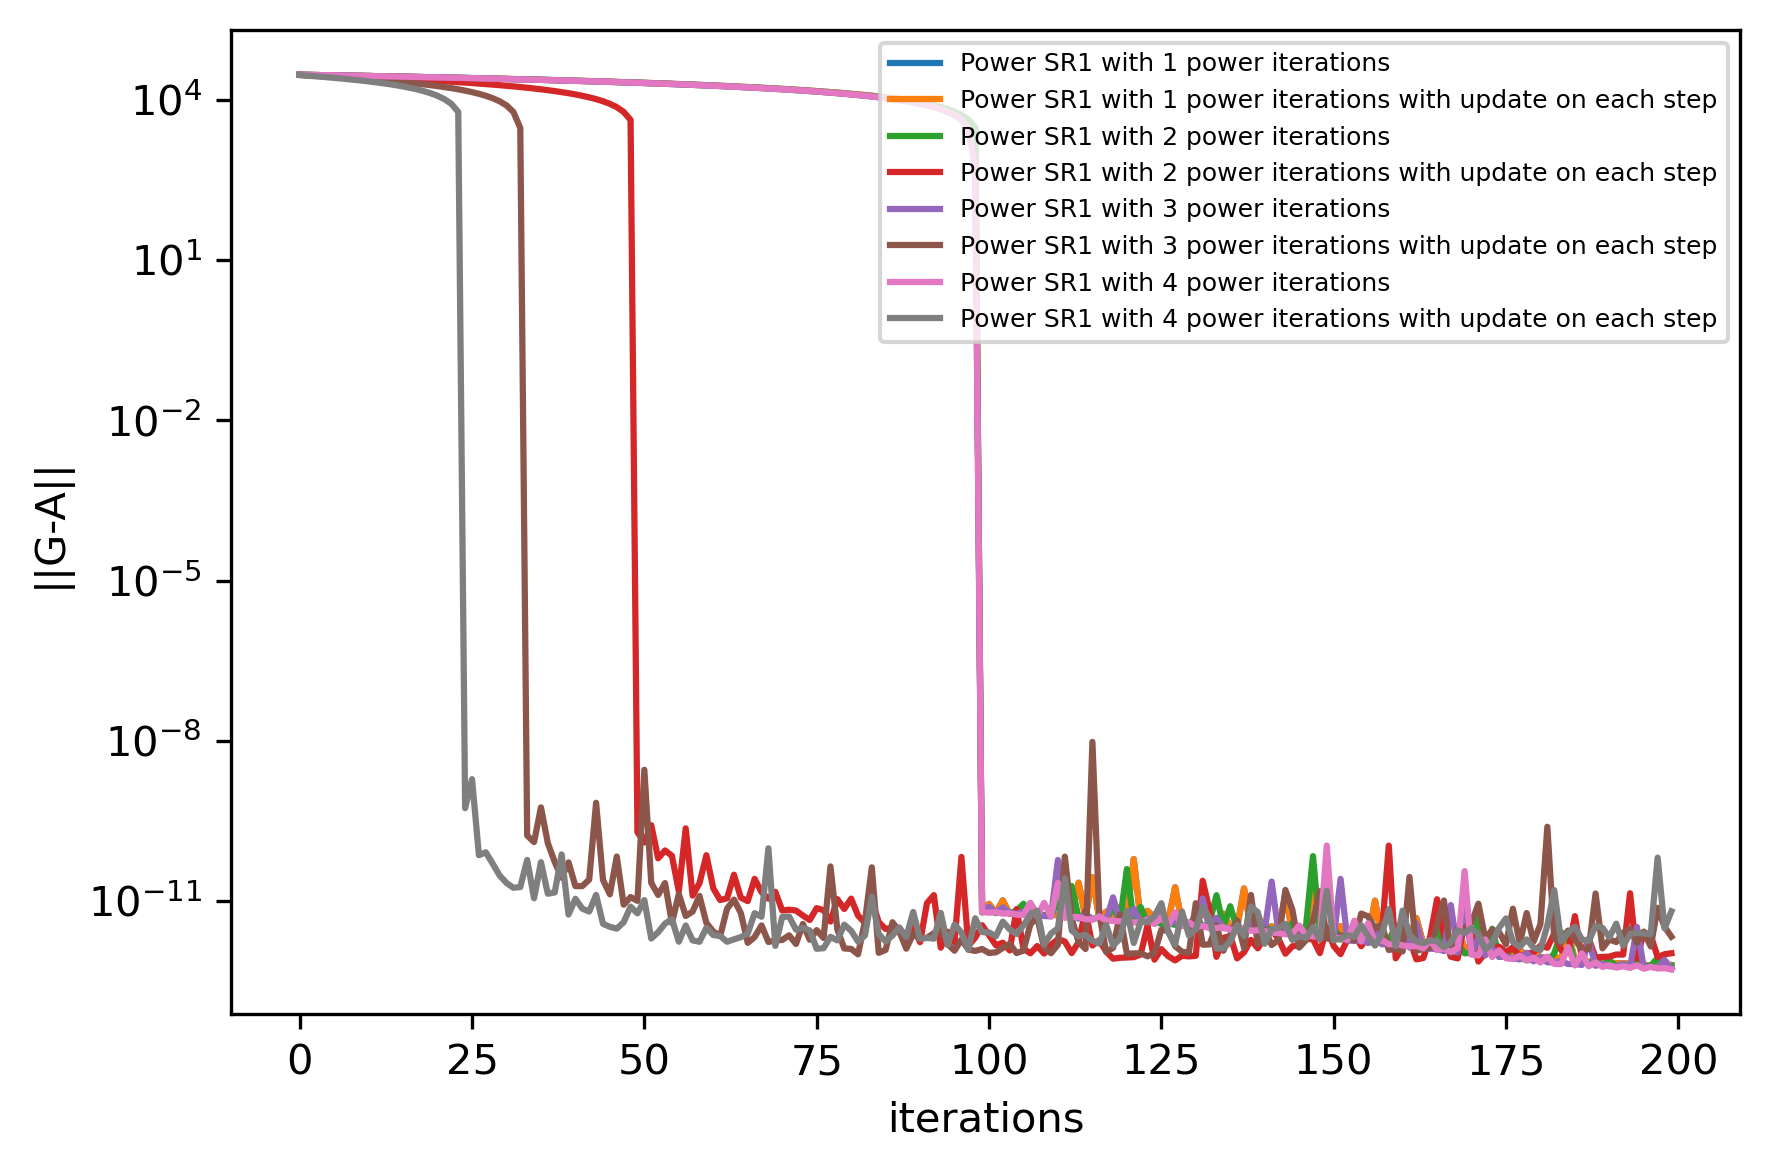

In [12]:
# np.random.seed(0)
# n = 500
# A = np.random.rand(n, n) 
# A = (A @ A.T) #+ np.diag(np.random.rand(n))
# B0 = np.eye(n) * 300
# n_iter = 1000
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

    
np.random.seed(0)
n = 100
A = np.random.rand(n, n) 
A = (A @ A.T)
print(f"largest eigenval of A: {sorted(np.linalg.eigvals(A))[-1]}")
B0 = np.eye(n) * 3000
n_iter = 200

for n_power in tqdm([1, 2, 3, 4]):
    _, history = sampled_sr1(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations")
    _, history = sampled_sr1_with_update_on_each_power_step(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations with update on each step")

# _, history = nesterov_greedy_sr1(A=A, B=B0, n_iter=n_iter, verbose=False)
# plt.semilogy(history, label=f"Greedy SR1")
plt.xlabel('iterations')
plt.ylabel('||G-A||')
plt.legend(loc = "upper right", prop={'size': 6})
plt.tight_layout()    
plt.savefig('matrix_learning.pdf')
# plt.show()

In [13]:
def sampled_sr1_block(A, B, n_iter, n_power=0, verbose=False):
    np.random.seed(0)
    history_hess = []
    history_vec = []
    Bk = B.copy()
    for _ in range(n_iter):
        s = np.random.rand(A.shape[1])
         
        S = [s]
        Y = [(A - Bk) @ s]
        for _ in range(n_power):
            s, lamda_max = power_method(A - Bk, s, n_iter=1)
            y = (A - Bk) @ s 
                
            S.append(s)
            Y.append(y)
        S = np.vstack(S).T
        Y = np.vstack(Y).T
        
        M = S.T @ Y
        M = 0.5*(M+M.T)
      
        D, V = np.linalg.eigh(M)
        Dtm = D+0.0
#         D[np.abs(D) < 1e-1] = 0.01
        D[np.abs(D) < 1e-3] = 1e-3


        D = 1 / (D)
        D[np.abs(Dtm) < 1e-1] = 0
        
        D = np.diag(D)
         
        M_inv =  V  @   D  @ V.T # np.linalg.pinv(M) # # 
         
#         print(V) 
        Bk += Y @ M_inv @ Y.T
         
        history_hess.append(np.linalg.norm(A - Bk))
#     print(M.shape)
#     print(M)
    return Bk, history_hess#, history_vec

largest eigenval of A: 24.805646694545885


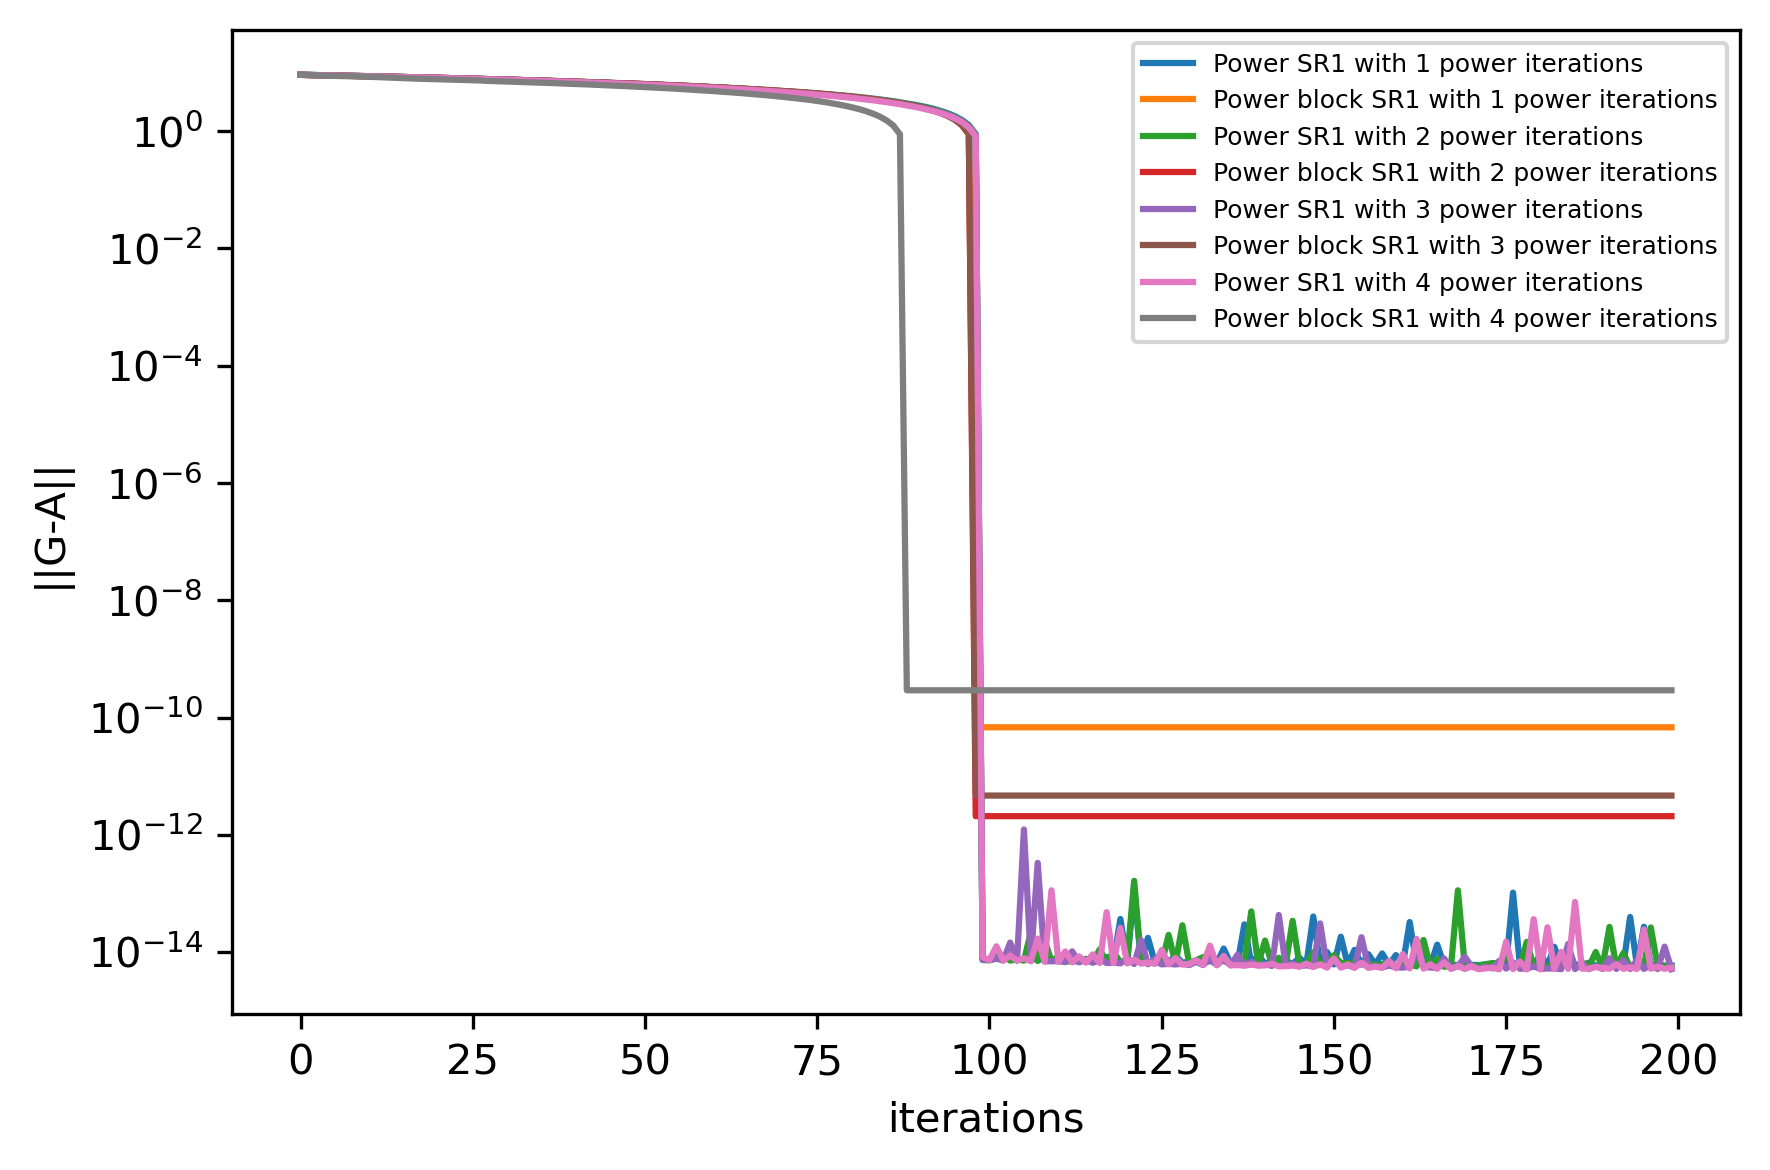

In [14]:
# np.random.seed(0)
# n = 500
# A = np.random.rand(n, n) 
# A = (A @ A.T) #+ np.diag(np.random.rand(n))
# B0 = np.eye(n) * 300
# n_iter = 1000
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

    
np.random.seed(0)
n = 100
A = np.random.rand(n, n) 
A = (A @ A.T)/100
print(f"largest eigenval of A: {sorted(np.linalg.eigvals(A))[-1]}")
B0 = np.eye(n) 
n_iter = 200

for n_power in tqdm([1,2,3, 4]):
    _, history = sampled_sr1(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations")
#     _, history = sampled_sr1_with_update_on_each_power_step(A=A, B=B0, n_iter=n_iter, n_power=n_power)
#     plt.semilogy(history, label=f"Power SR1 with {n_power} power iterations with update on each step")
    BK, history = sampled_sr1_block(A=A, B=B0, n_iter=n_iter, n_power=n_power)
    plt.semilogy(history, label=f"Power block SR1 with {n_power} power iterations")

# _, history = nesterov_greedy_sr1(A=A, B=B0, n_iter=n_iter, verbose=False)
# plt.semilogy(history, label=f"Greedy SR1")
plt.xlabel('iterations')
plt.ylabel('||G-A||')
plt.legend(loc = "upper right", prop={'size': 6})
plt.tight_layout()    
plt.savefig('matrix_learning.pdf')
# plt.show()

In [15]:
B0

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
A

array([[0.30665183, 0.24440006, 0.2377752 , ..., 0.27020109, 0.26158466,
        0.23808053],
       [0.24440006, 0.3554382 , 0.25877217, ..., 0.29515078, 0.2829212 ,
        0.27384252],
       [0.2377752 , 0.25877217, 0.35073604, ..., 0.29046699, 0.28428296,
        0.2694863 ],
       ...,
       [0.27020109, 0.29515078, 0.29046699, ..., 0.41015543, 0.31131207,
        0.28250229],
       [0.26158466, 0.2829212 , 0.28428296, ..., 0.31131207, 0.37777135,
        0.27149518],
       [0.23808053, 0.27384252, 0.2694863 , ..., 0.28250229, 0.27149518,
        0.35223503]])